## ML 2020 Ex3 Group 38 jupyter notebook

In [1]:
# run this to create train/test data split from raw data
# %run "prepare.py" 7 3

In [2]:
%load_ext autoreload
%autoreload 1

In [4]:
%aimport networks
%aimport modules
%aimport modules_DAE
%aimport utils

In [5]:
from networks import SoftMax, LogSoftMax, MLP, DAELayer, DAESoftMax, ConvNet
from modules import buildModel, test, invertModel
from modules_DAE import buildDAELayer, buildDAESoftmaxModel, evaluateModel_DAE, testDAE, invertDAE, evaluate_DAEs

In [ ]:
# train first dae layer

buildDAELayer(DAELayer(10304, 1000), lRate=1e-4, epochs=5000, plot=True)

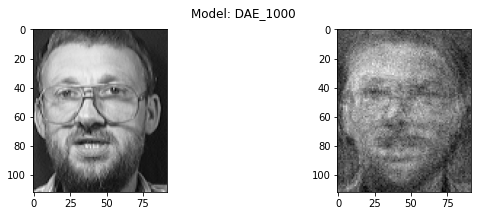

In [21]:
# evaluate outcome of first dae layer (needs a model in ./models/DAE_1000_model.pt)

layer_1 = DAELayer(10304, 1000)

evaluateModel_DAE(layer_1, 5)

In [ ]:
# train second dae layer with dae1000 preprocessed imgs

buildDAELayer(DAELayer(1000, 300), lRate=1e-4, epochs=5000, plot=True)

Starting at 23:44:40 to build DAE_300 model...
epoch: 100
epoch: 200
epoch: 300
epoch: 400
epoch: 500
epoch: 600
epoch: 700
epoch: 800
epoch: 900
epoch: 1000
epoch: 1100
epoch: 1200
epoch: 1300
epoch: 1400
epoch: 1500
epoch: 1600
epoch: 1700
epoch: 1800
epoch: 1900
epoch: 2000
epoch: 2100
epoch: 2200
epoch: 2300
epoch: 2400
epoch: 2500
epoch: 2600
epoch: 2700
epoch: 2800
epoch: 2900
epoch: 3000
epoch: 3100
epoch: 3200
epoch: 3300
epoch: 3400
epoch: 3500
epoch: 3600
epoch: 3700
epoch: 3800
epoch: 3900
epoch: 4000
epoch: 4100
epoch: 4200
epoch: 4300
epoch: 4400
epoch: 4500
epoch: 4600
epoch: 4700
epoch: 4800
epoch: 4900
epoch: 5000
Finished at 00:37:14, duration in sec: 3153


RuntimeError: shape '[112, 92]' is invalid for input of size 1000

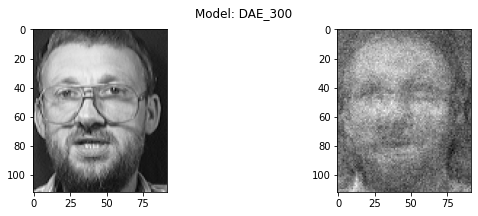

In [9]:
# evaluate outcome of second dae layer (needs a model in ./models/DAE_300_model.pt)

layer_2 = DAELayer(1000, 300)

evaluateModel_DAE(layer_2, 5)

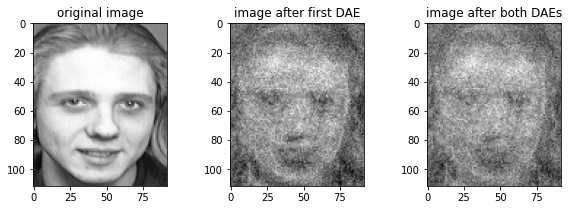

In [25]:
evaluate_DAEs(3, save=True)

Starting at 21:49:52 to build DAESoftMax model...
epoch: 100
epoch: 200
Finished at 21:51:42, duration in sec: 109


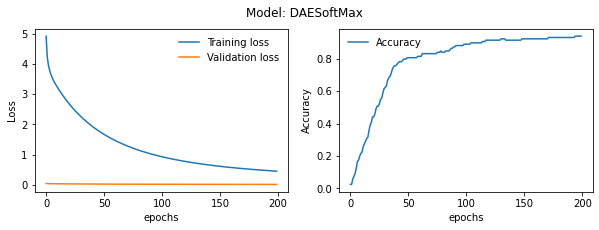

In [31]:
# train softmax with dae1000 and dae300 preprocessed imgs

buildDAESoftmaxModel(DAESoftMax(), lRate=1e-2, epochs=200, plot=True)

Starting at 21:44:57 to invert DAESoftMax...
Finished at 21:45:39, duration in sec: 42


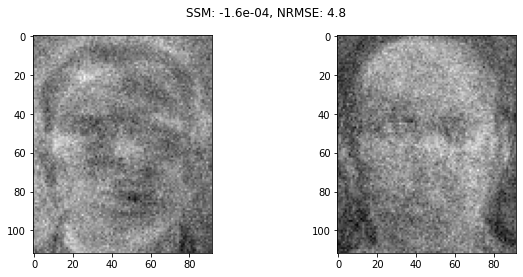

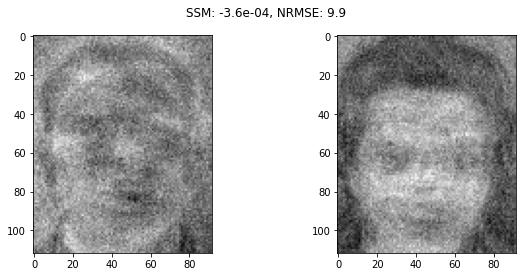

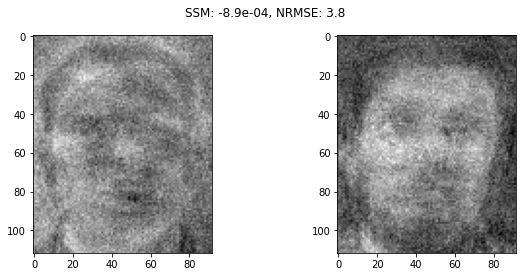

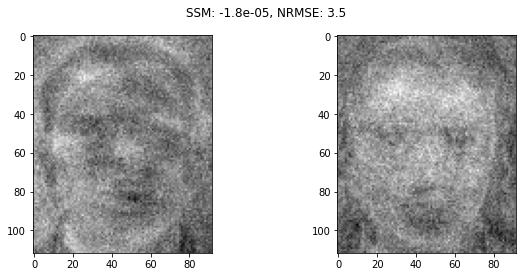

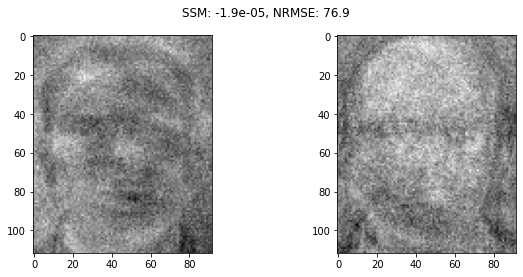

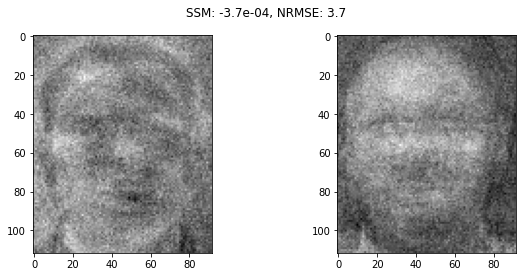

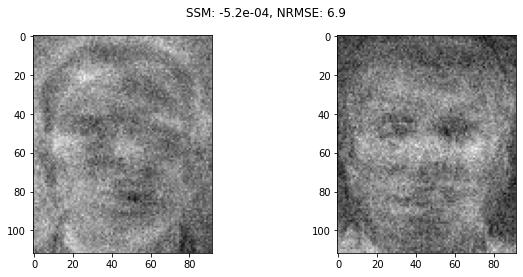

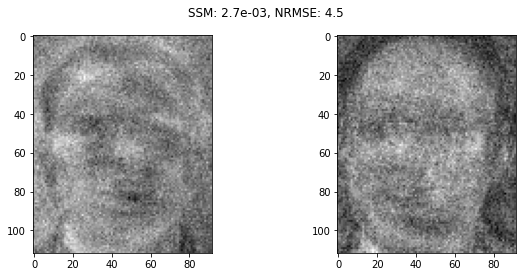

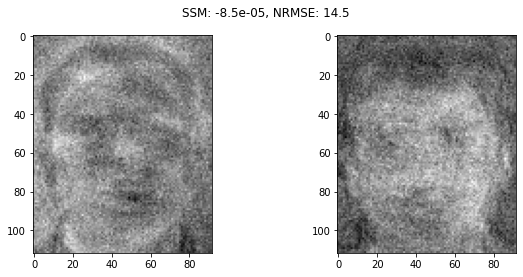

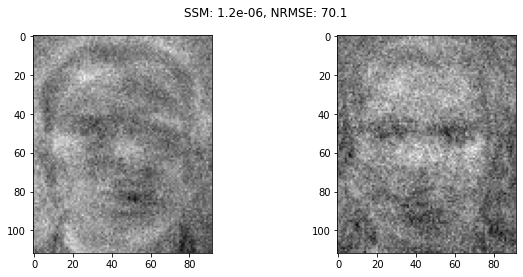

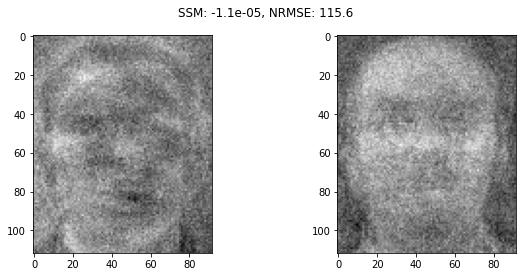

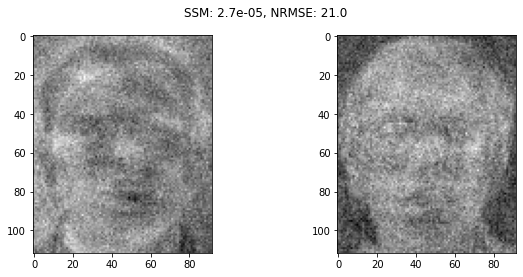

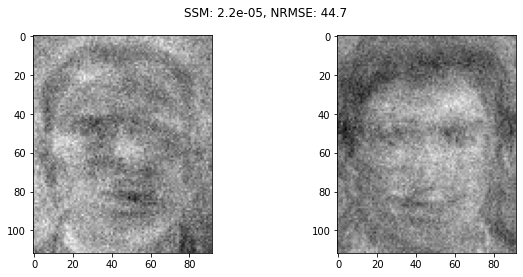

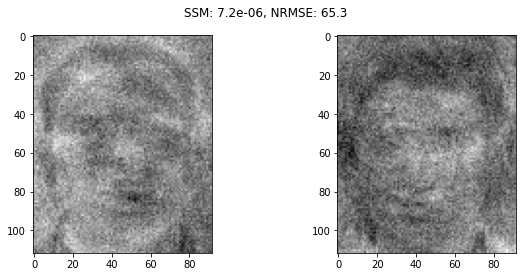

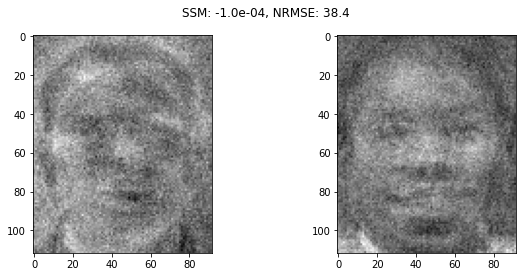

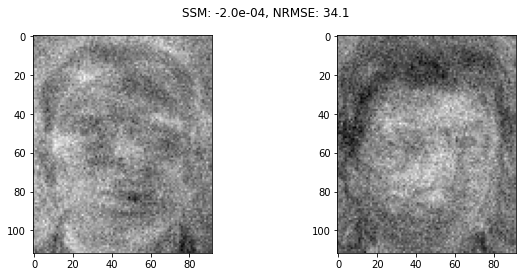

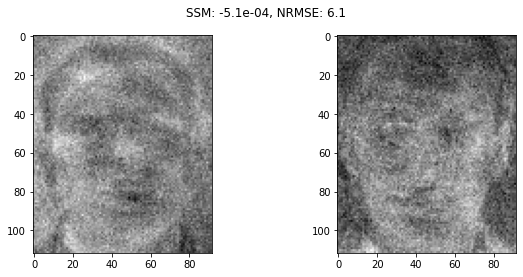

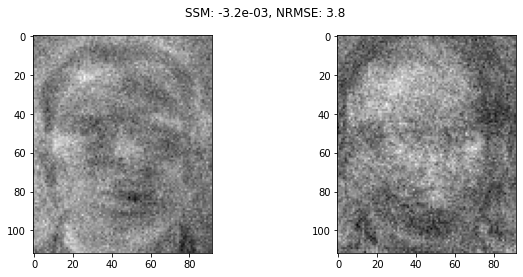

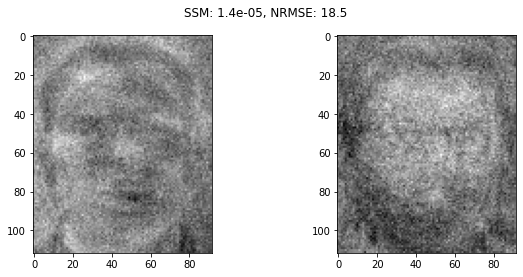

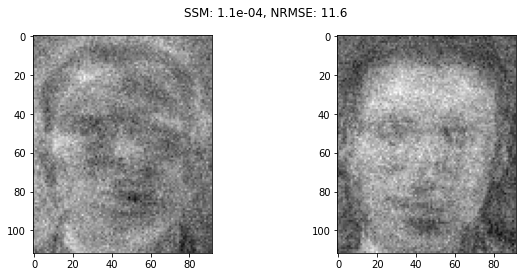

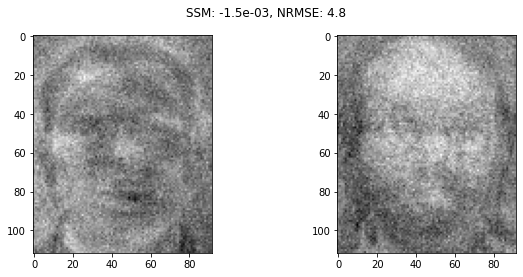

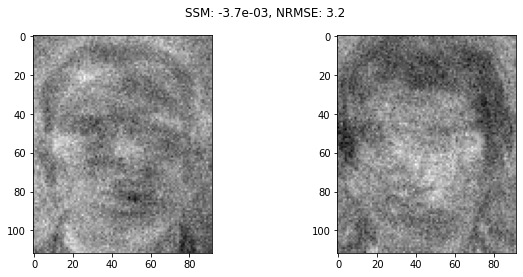

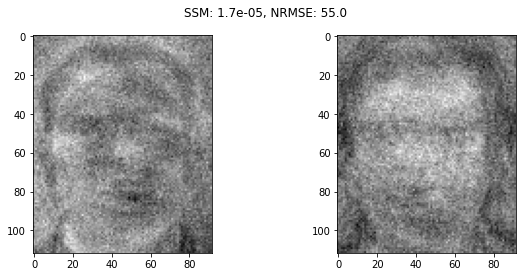

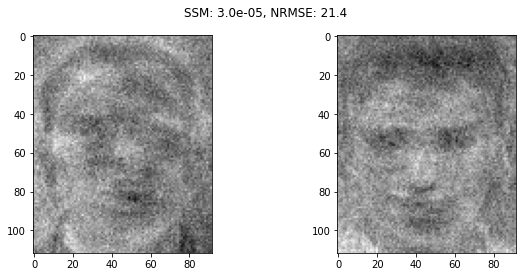

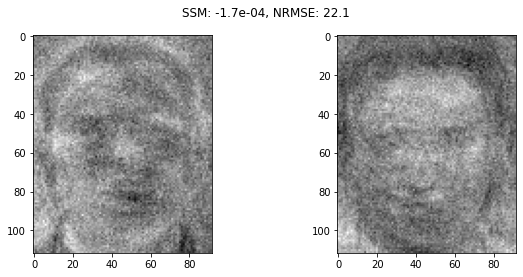

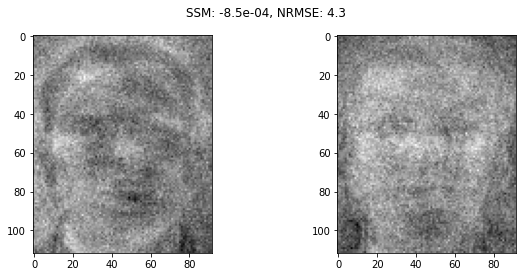

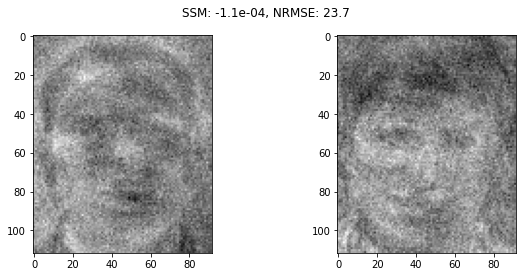

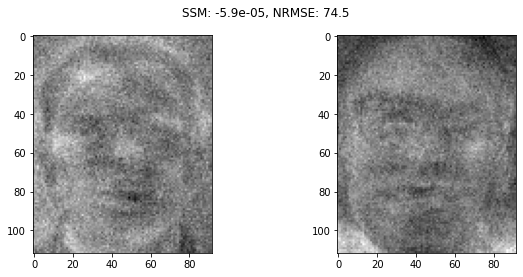

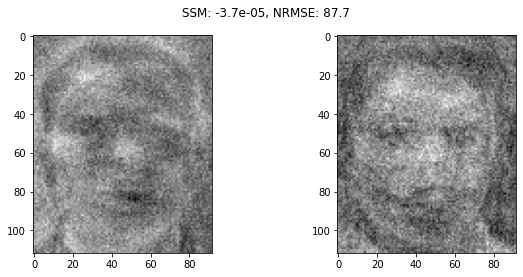

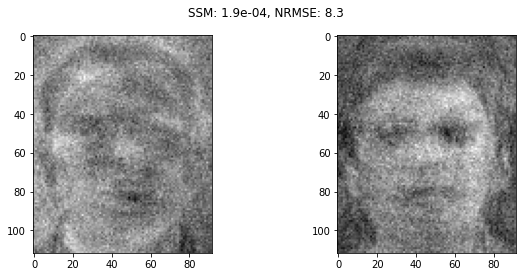

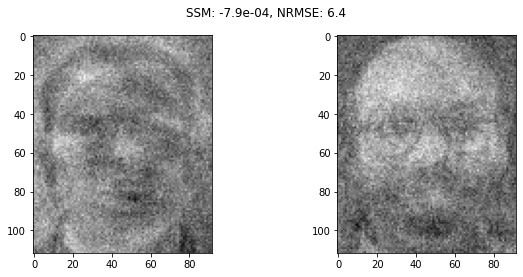

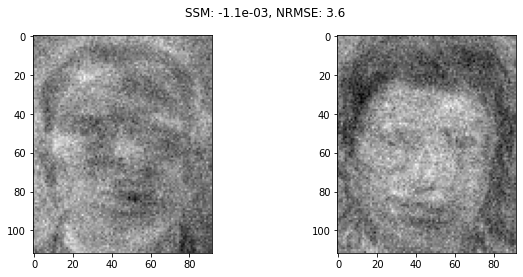

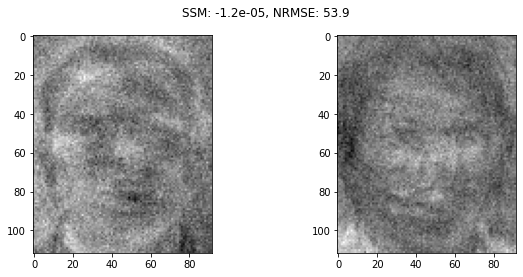

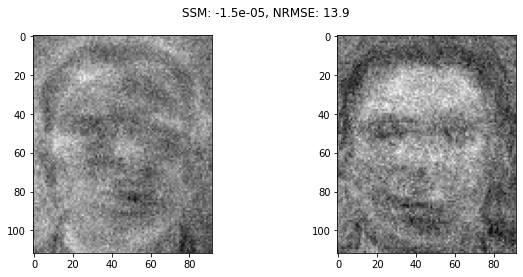

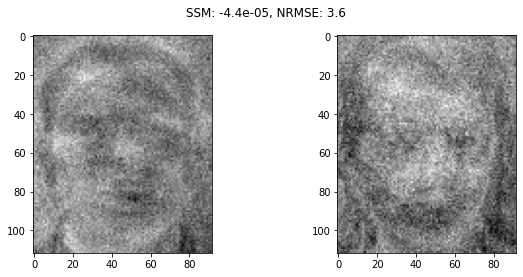

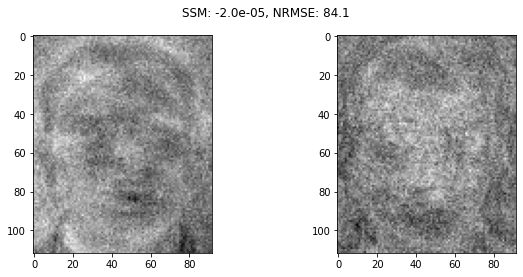

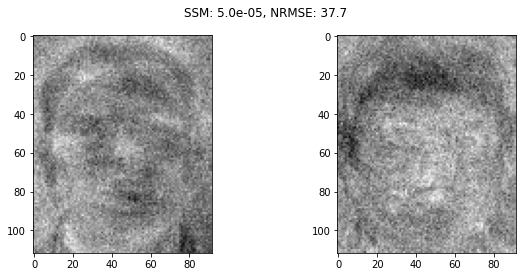

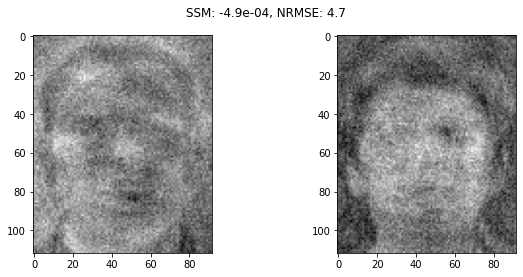

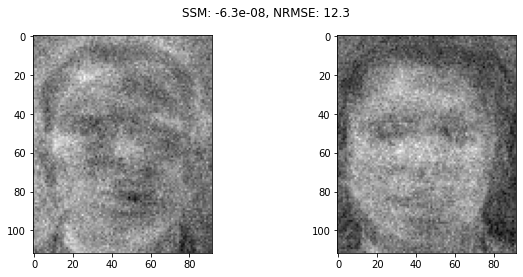

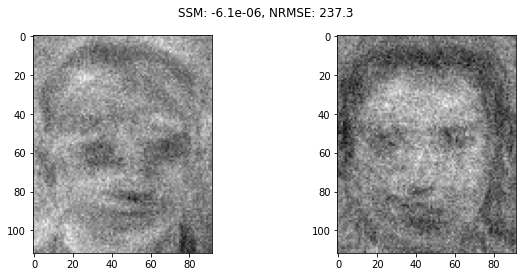

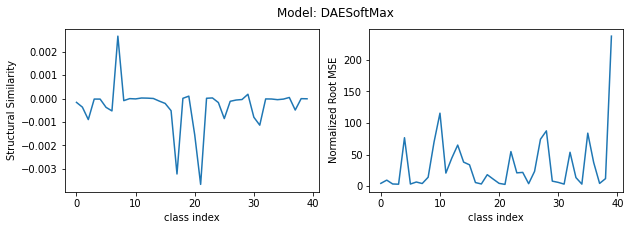

SSM: mean -3.07e-04, std 9.24e-04
NRMSE: mean 3.30e+01, std 4.39e+01


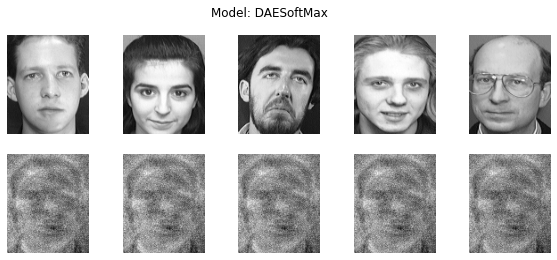

In [28]:
invertDAE(DAESoftMax(), lrMod=4, lrInv=4, nStep=400, processing=False, plot=True, save=True)

In [ ]:
invertDAE(DAESoftMax(), lrMod=0.001, lrInv=0.001, nStep=10, processing=True, plot=True)

Starting at 21:55:20 to build LogSoftMax model...
epoch: 100
epoch: 200
epoch: 300
Finished at 21:57:48, duration in sec: 148
Total number of iterations  314 , with accuracy of  1.0


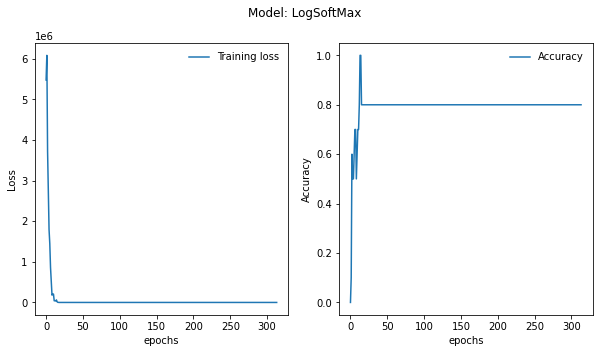

In [37]:
buildModel(LogSoftMax(), lRate=0.1, iCount=300, plot=True)

Starting at 21:58:11 to invert SoftMax...
Finished at 21:58:18, duration in sec: 7


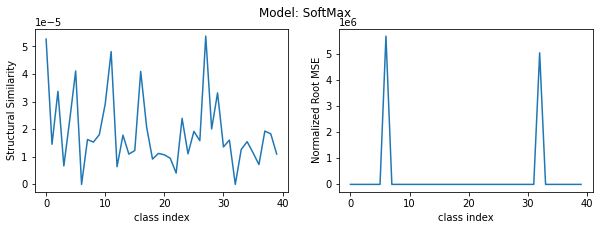

SSM: mean 1.89e-05, std 1.31e-05
NRMSE: mean 2.69e+05, std 1.17e+06


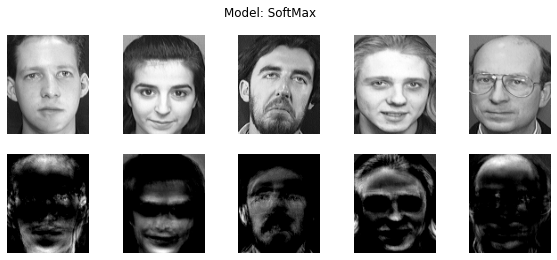

In [39]:
invertModel(SoftMax(), lrMod=0.001, lrInv=0.001, nStep=50, plot=True)

In [ ]:
buildModel(MLP(), 0.0001, 500, True)

In [19]:
test(MLP())

Accuracy of the model  MLP  on the 120 test images: 2 %


Starting at 19:10:04 to invert MLP...
Finished at 19:11:36, duration in sec: 91


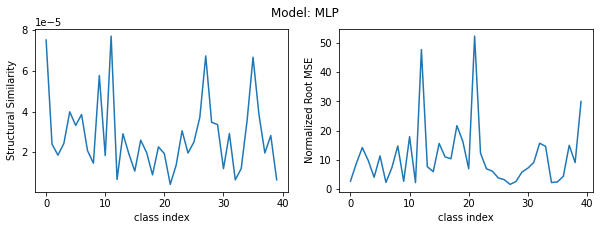

SSM: mean 2.82e-05, std 1.82e-05
NRMSE: mean 1.11e+01, std 1.08e+01


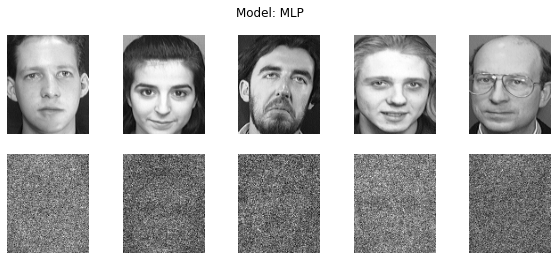

In [5]:
invertModel(MLP(), 0.0001, 0.01, 20, plot=True)

In [ ]:
buildModel(ConvNet(), 0.001, 50, True)

In [ ]:
invert(ConvNet(), 0.01, 0.01, 50, plot=True)